<a href="https://colab.research.google.com/github/kkr016/Service-time-prediction-using-tractor-service-data/blob/main/Service_time_prediction_using_tractor_service_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk as nlp
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [83]:
df= pd.read_csv('/content/Predective Analysis of Customer Support.xlsx - ORC2.0 Report.csv')
df.head(2)

,Project Type,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Failure Date,Problem Definition (Step-1),Observations (Step-2),System,Sub System,Under Analysis (Step-3),...,Date of ORC Creation,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7,Time to Solution Release (days),Time to Close the ORC (days),Remarks
0,Regular,4,Non Warrantable,Track,27-Dec-2020 17:49,feed pump is fouling with Hood,feed pump is fouling with Hood,Engine,NaN,The Feed Pump position is not changed with res...,...,30-Dec-2020 17:49,30-Dec-2020 17:50,31-Dec-2020 13:11,13-Jan-2021 16:23,19-Jan-2021 21:06,NaN,04-Feb-2021 14:48,20.0,36.0,Based on COE remarks Orc has been Closed
1,Regular,5,Non Warrantable,Build,16-04-2021 12:00:00 AM,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",NaN,Hydraulic,HYDRAULIC LINES-FD0310,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,...,17-May-2021 23:42,18-May-2021 02:10,19-May-2021 13:00,28-May-2021 09:43,31-May-2021 11:48,17-Jun-2021 09:02,NaN,14.0,NaN,As per COE comment hose length corrected in dr...


In [84]:
cop=df

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Project Type                                149 non-null    object 
 1   Severity of Problem                         149 non-null    int64  
 2   Warrantable/Non Warrantable                 126 non-null    object 
 3   Type of ORC                                 149 non-null    object 
 4   Failure Date                                149 non-null    object 
 5   Problem Definition (Step-1)                 149 non-null    object 
 6   Observations (Step-2)                       119 non-null    object 
 7   System                                      144 non-null    object 
 8   Sub System                                  76 non-null     object 
 9   Under Analysis (Step-3)                     123 non-null    object 
 10  Solution Ident

In [86]:
#Converting the column's date to date format
lst=['Failure Date','Date of ORC Creation', 'Date to reach at Step 2', 'Date to reach at Step 3', 'Date to reach at Step 4', 'Date to reach at Step 5','Date to reach at Step 6','Date to reach at Step 7']
for i in lst:
  df[i]=pd.to_datetime(df[i])

In [87]:
df.isnull().sum()

Project Type                                    0
Severity of Problem                             0
Warrantable/Non Warrantable                    23
Type of ORC                                     0
Failure Date                                    0
Problem Definition (Step-1)                     0
Observations (Step-2)                          30
System                                          5
Sub System                                     73
Under Analysis (Step-3)                        26
Solution Identification & Release (Step-4)    125
Solution Validation & ORC Closure (Step-5)      0
Solution Implementation (Step-6)              149
Conclusion and Tracking (Step 7)              149
ORC Current Status                              0
Date of ORC Creation                            0
Date to reach at Step 2                         1
Date to reach at Step 3                         7
Date to reach at Step 4                        22
Date to reach at Step 5                        22


In [88]:
#Dropping unnecessary column 'Project Type'
df['Project Type'].unique()
df=df.drop('Project Type',axis=1)
df.head(2)

,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Failure Date,Problem Definition (Step-1),Observations (Step-2),System,Sub System,Under Analysis (Step-3),Solution Identification & Release (Step-4),...,Date of ORC Creation,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7,Time to Solution Release (days),Time to Close the ORC (days),Remarks
0,4,Non Warrantable,Track,2020-12-27 17:49:00,feed pump is fouling with Hood,feed pump is fouling with Hood,Engine,NaN,The Feed Pump position is not changed with res...,NaN,...,2020-12-30 17:49:00,2020-12-30 17:50:00,2020-12-31 13:11:00,2021-01-13 16:23:00,2021-01-19 21:06:00,NaT,2021-02-04 14:48:00,20.0,36.0,Based on COE remarks Orc has been Closed
1,5,Non Warrantable,Build,2021-04-16 00:00:00,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",NaN,Hydraulic,HYDRAULIC LINES-FD0310,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,HOSE LENGTH CORRECTED IN DRAWING,...,2021-05-17 23:42:00,2021-05-18 02:10:00,2021-05-19 13:00:00,2021-05-28 09:43:00,2021-05-31 11:48:00,2021-06-17 09:02:00,NaT,14.0,NaN,As per COE comment hose length corrected in dr...


In [89]:
#Binary encoding to Warranty column
df=df.replace({'Warrantable': 1, 'Non Warrantable': 0})
df['Warrantable/Non Warrantable']=df['Warrantable/Non Warrantable'].fillna(df['Warrantable/Non Warrantable'].mode()[0])
df.head(2)

,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Failure Date,Problem Definition (Step-1),Observations (Step-2),System,Sub System,Under Analysis (Step-3),Solution Identification & Release (Step-4),...,Date of ORC Creation,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7,Time to Solution Release (days),Time to Close the ORC (days),Remarks
0,4,0.0,Track,2020-12-27 17:49:00,feed pump is fouling with Hood,feed pump is fouling with Hood,Engine,NaN,The Feed Pump position is not changed with res...,NaN,...,2020-12-30 17:49:00,2020-12-30 17:50:00,2020-12-31 13:11:00,2021-01-13 16:23:00,2021-01-19 21:06:00,NaT,2021-02-04 14:48:00,20.0,36.0,Based on COE remarks Orc has been Closed
1,5,0.0,Build,2021-04-16 00:00:00,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",NaN,Hydraulic,HYDRAULIC LINES-FD0310,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,HOSE LENGTH CORRECTED IN DRAWING,...,2021-05-17 23:42:00,2021-05-18 02:10:00,2021-05-19 13:00:00,2021-05-28 09:43:00,2021-05-31 11:48:00,2021-06-17 09:02:00,NaT,14.0,NaN,As per COE comment hose length corrected in dr...


In [90]:
#Calculating the days between two stages 
#DateX created
df['Failure Date'] = pd.to_datetime(df['Failure Date'])
df['Date of ORC Creation'] = pd.to_datetime(df['Date of ORC Creation'])

df['DateX'] = [abs(relativedelta(a, b).days) for a, b in zip(df['Failure Date'], df['Date of ORC Creation'])]
df.head(2)

,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Failure Date,Problem Definition (Step-1),Observations (Step-2),System,Sub System,Under Analysis (Step-3),Solution Identification & Release (Step-4),...,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7,Time to Solution Release (days),Time to Close the ORC (days),Remarks,DateX
0,4,0.0,Track,2020-12-27 17:49:00,feed pump is fouling with Hood,feed pump is fouling with Hood,Engine,NaN,The Feed Pump position is not changed with res...,NaN,...,2020-12-30 17:50:00,2020-12-31 13:11:00,2021-01-13 16:23:00,2021-01-19 21:06:00,NaT,2021-02-04 14:48:00,20.0,36.0,Based on COE remarks Orc has been Closed,3
1,5,0.0,Build,2021-04-16 00:00:00,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",NaN,Hydraulic,HYDRAULIC LINES-FD0310,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,HOSE LENGTH CORRECTED IN DRAWING,...,2021-05-18 02:10:00,2021-05-19 13:00:00,2021-05-28 09:43:00,2021-05-31 11:48:00,2021-06-17 09:02:00,NaT,14.0,NaN,As per COE comment hose length corrected in dr...,1


In [91]:
#Filling missing values in 'System' column
df['System']=df['System'].fillna(df['System'].mode()[0])
df.head(2)

,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Failure Date,Problem Definition (Step-1),Observations (Step-2),System,Sub System,Under Analysis (Step-3),Solution Identification & Release (Step-4),...,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7,Time to Solution Release (days),Time to Close the ORC (days),Remarks,DateX
0,4,0.0,Track,2020-12-27 17:49:00,feed pump is fouling with Hood,feed pump is fouling with Hood,Engine,NaN,The Feed Pump position is not changed with res...,NaN,...,2020-12-30 17:50:00,2020-12-31 13:11:00,2021-01-13 16:23:00,2021-01-19 21:06:00,NaT,2021-02-04 14:48:00,20.0,36.0,Based on COE remarks Orc has been Closed,3
1,5,0.0,Build,2021-04-16 00:00:00,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",NaN,Hydraulic,HYDRAULIC LINES-FD0310,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,HOSE LENGTH CORRECTED IN DRAWING,...,2021-05-18 02:10:00,2021-05-19 13:00:00,2021-05-28 09:43:00,2021-05-31 11:48:00,2021-06-17 09:02:00,NaT,14.0,NaN,As per COE comment hose length corrected in dr...,1


In [92]:
#Dropping 'Sub Syatem'
df['Sub System'].unique()
df=df.drop('Sub System',axis=1)

#One Hot Encoding for the column
df = pd.get_dummies(df, columns = ['System'])
df.head(2)

,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Failure Date,Problem Definition (Step-1),Observations (Step-2),Under Analysis (Step-3),Solution Identification & Release (Step-4),Solution Validation & ORC Closure (Step-5),Solution Implementation (Step-6),...,System_Electrical,System_Engine,System_Engine-Integration,System_Frontal-System,System_Hydraulic,System_Linkage-System,System_Rear-System,System_Tractor-System,System_Transmission,System_Vehicle-Architect
0,4,0.0,Track,2020-12-27 17:49:00,feed pump is fouling with Hood,feed pump is fouling with Hood,The Feed Pump position is not changed with res...,NaN,Based on COE remarks Orc has been Closed,NaN,...,0,1,0,0,0,0,0,0,0,0
1,5,0.0,Build,2021-04-16 00:00:00,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",NaN,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,HOSE LENGTH CORRECTED IN DRAWING,As per COE comment hose length corrected in dr...,NaN,...,0,0,0,0,1,0,0,0,0,0


In [93]:
#Filling missing values from the similar previous column
df['Date to reach at Step 2'].fillna(df['Date of ORC Creation'], inplace=True)
df['Date to reach at Step 3'].fillna(df['Date to reach at Step 2'], inplace=True)
df['Date to reach at Step 4'].fillna(df['Date to reach at Step 3'], inplace=True)
df['Date to reach at Step 5'].fillna(df['Date to reach at Step 4'], inplace=True)
df['Date to reach at Step 6'].fillna(df['Date to reach at Step 5'], inplace=True)
df['Date to reach at Step 7'].fillna(df['Date to reach at Step 6'], inplace=True)

In [94]:
#Filling the 'Time to Solution Release (days)' column by imputing values
df['X'] = [abs(relativedelta(a, b).days) for a, b in zip(df['Date of ORC Creation'], df['Date to reach at Step 4'])]
df['Time to Solution Release (days)'].fillna(df['X'], inplace=True)
df=df.drop('X',axis=1)

In [95]:
#Filling the 'Time to Close the ORC (days)' column by imputing values
df['Y'] = [abs(relativedelta(a, b).days) for a, b in zip(df['Date of ORC Creation'], df['Date to reach at Step 5'])]
df['Time to Close the ORC (days)'].fillna(df['Y'], inplace=True)
df=df.drop('Y',axis=1)

Text(0.5, 1.0, 'ORC Current Status vs Time to Close the ORC (days)')

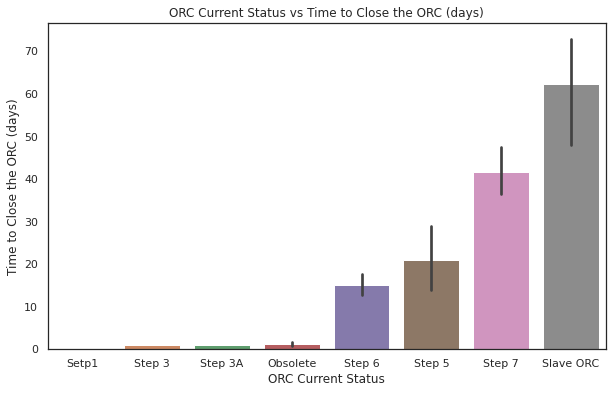

In [96]:
#Plotting 'ORC status' and 'Time to Close the ORC'
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['ORC Current Status'],y=df['Time to Close the ORC (days)'],ax=ax,order=df.groupby('ORC Current Status')['Time to Close the ORC (days)'].mean().reset_index().sort_values('Time to Close the ORC (days)')['ORC Current Status'])
plt.title('ORC Current Status vs Time to Close the ORC (days)')

In [97]:
print(df['ORC Current Status'].unique())

#Encoding and Dropping of few unnecessary columns
df=df.replace({'Slave ORC': 10, 'Setp1': 1, 'Step 3':2, 'Step 3A':2, 'Step 5':6, 'Step 6':5, 'Step 7':8,'Obsolete':3 })
df=df.drop(['Under Analysis (Step-3)','Solution Identification & Release (Step-4)','Solution Validation & ORC Closure (Step-5)','Solution Implementation (Step-6)','Conclusion and Tracking (Step 7)'],axis=1)
df=df.drop(['Failure Date', 'Remarks'], axis=1)
df.head(2)

['Step 7' 'Step 6' 'Obsolete' 'Step 5' 'Step 3' 'Step 3A' 'Slave ORC'
 'Setp1']


,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Problem Definition (Step-1),Observations (Step-2),ORC Current Status,Date of ORC Creation,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,...,System_Electrical,System_Engine,System_Engine-Integration,System_Frontal-System,System_Hydraulic,System_Linkage-System,System_Rear-System,System_Tractor-System,System_Transmission,System_Vehicle-Architect
0,4,0.0,Track,feed pump is fouling with Hood,feed pump is fouling with Hood,8,2020-12-30 17:49:00,2020-12-30 17:50:00,2020-12-31 13:11:00,2021-01-13 16:23:00,...,0,1,0,0,0,0,0,0,0,0
1,5,0.0,Build,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",NaN,5,2021-05-17 23:42:00,2021-05-18 02:10:00,2021-05-19 13:00:00,2021-05-28 09:43:00,...,0,0,0,0,1,0,0,0,0,0


In [98]:
#Days calculation between both the column
df['Stage_1_days'] = [abs(relativedelta(a, b).days) for a, b in zip(df['Date of ORC Creation'], df['Date to reach at Step 2'])]
df['Stage_2_days'] = [abs(relativedelta(a, b).days) for a, b in zip(df['Date to reach at Step 2'], df['Date to reach at Step 3'])]
df['Stage_3_days'] = [abs(relativedelta(a, b).days) for a, b in zip(df['Date to reach at Step 3'], df['Date to reach at Step 4'])]
df['Stage_4_days'] = [abs(relativedelta(a, b).days) for a, b in zip(df['Date to reach at Step 5'], df['Date to reach at Step 5'])]
df['Stage_5_days'] = [abs(relativedelta(a, b).days) for a, b in zip(df['Date to reach at Step 6'], df['Date to reach at Step 6'])]
df['Stage_6_days'] = [abs(relativedelta(a, b).days) for a, b in zip(df['Date to reach at Step 6'], df['Date to reach at Step 7'])]

In [99]:
#Dropping
lst=['Date of ORC Creation', 'Date to reach at Step 2', 'Date to reach at Step 3', 'Date to reach at Step 4', 'Date to reach at Step 5', 'Date to reach at Step 6','Date to reach at Step 7']

for i in lst:
  df=df.drop(i,axis=1)

#EDA

Text(0.5, 1.0, 'Warrantable/Non Warrantable vs Time to Close the ORC (days)')

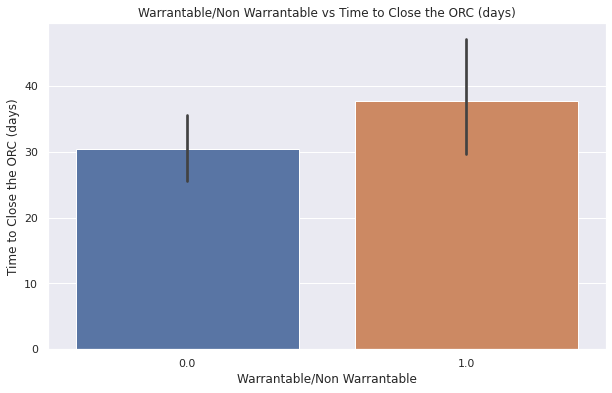

In [100]:
#Barplot Plotting
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['Warrantable/Non Warrantable'],y=df['Time to Close the ORC (days)'],ax=ax,order=df.groupby('Warrantable/Non Warrantable')['Time to Close the ORC (days)'].mean().reset_index().sort_values('Time to Close the ORC (days)')['Warrantable/Non Warrantable'])
plt.title('Warrantable/Non Warrantable vs Time to Close the ORC (days)')

Text(0.5, 1.0, 'Severity of Problem vs Time to Close the ORC (days)')

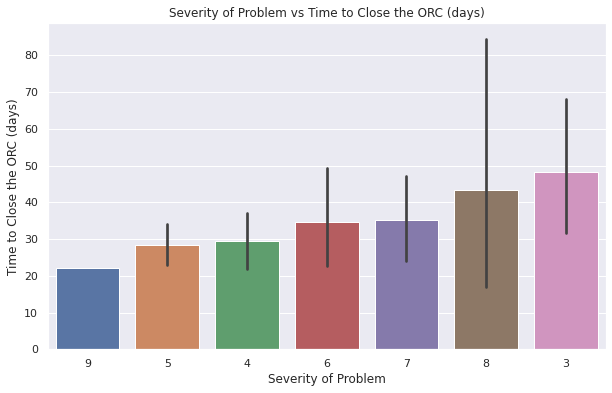

In [101]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['Severity of Problem'],y=df['Time to Close the ORC (days)'],ax=ax,order=df.groupby('Severity of Problem')['Time to Close the ORC (days)'].mean().reset_index().sort_values('Time to Close the ORC (days)')['Severity of Problem'])
plt.title('Severity of Problem vs Time to Close the ORC (days)')

Text(0.5, 1.0, 'Type of ORC vs Time to Close the ORC (days)')

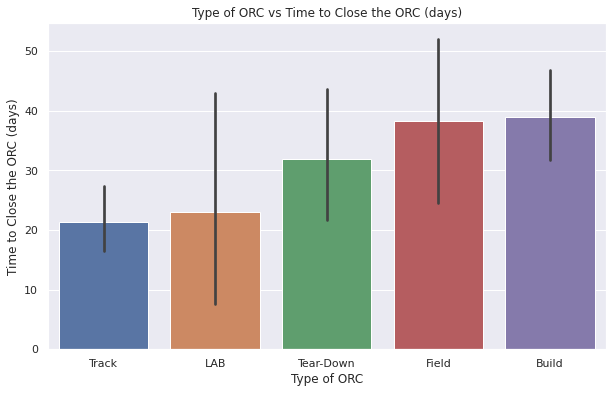

In [102]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['Type of ORC'],y=df['Time to Close the ORC (days)'],ax=ax,order=df.groupby('Type of ORC')['Time to Close the ORC (days)'].mean().reset_index().sort_values('Time to Close the ORC (days)')['Type of ORC'])
plt.title('Type of ORC vs Time to Close the ORC (days)')

In [103]:
df['Type of ORC'].unique()

array(['Track', 'Build', 'Field', 'Tear-Down', 'LAB'], dtype=object)

In [104]:
#Encodding 'Type of ORC'
df['Type of ORC']=df['Type of ORC'].map({'Track':1,'LAB':2,'Tear-Down':3,'Field':4,'Build':5})

Text(0.5, 1.0, 'Type of ORC vs Time to Close the ORC (days)')

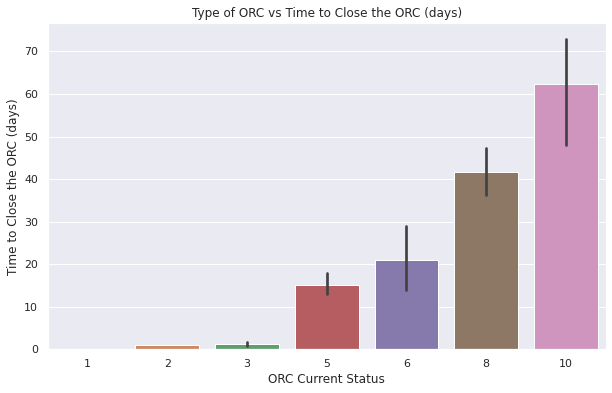

In [105]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['ORC Current Status'],y=df['Time to Close the ORC (days)'],ax=ax,order=df.groupby('ORC Current Status')['Time to Close the ORC (days)'].mean().reset_index().sort_values('Time to Close the ORC (days)')['ORC Current Status'])
plt.title('Type of ORC vs Time to Close the ORC (days)')

# **NLP**

In [106]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt') 
nltk.download('wordnet') 
nltk.download('stopwords') 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [107]:
#Converting column to string type
lst2=['Problem Definition (Step-1)','Observations (Step-2)']
 
df['Problem Definition (Step-1)'] = df['Problem Definition (Step-1)'].astype(str)
df['Observations (Step-2)'] = df['Observations (Step-2)'].astype(str)

In [108]:
#Removing punctuations
df['Problem Definition (Step-1)'] = df['Problem Definition (Step-1)'].str.replace("[^a-zA-Z0-9]", " ")
df['Observations (Step-2)'] = df['Observations (Step-2)'].str.replace("[^a-zA-Z0-9]", " ")

In [109]:
#Converting to lower case
lst2=['Problem Definition (Step-1)','Observations (Step-2)']
for i in lst2:
  df[i] = df[i].replace("[^a-zA-Z0-9]", " ")
  df[i] = [review.lower() for review in df[i]]

In [110]:
df['Observations (Step-2)']

0                        feed pump  is fouling with hood
1                                                    nan
2      oil leakage observed from brake drum drain plu...
3      battery tray base plate found in bend conditio...
4      orc s seprated for steering and fender aggrega...
                             ...                        
144    hand accelerator cable got bend   ferul also d...
145    in ynxt 28 hp  field validation tractor during...
146    rh front combination lamp park lamp is not glo...
147    feed pump  is fouling with hood assembly obser...
148    paint peel off noticed in fender console durin...
Name: Observations (Step-2), Length: 149, dtype: object

In [111]:
#Removing stopwords
lst2=['Problem Definition (Step-1)','Observations (Step-2)']
for i in lst2:
  stop_words = stopwords.words('english')
  df[i] = df[i].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

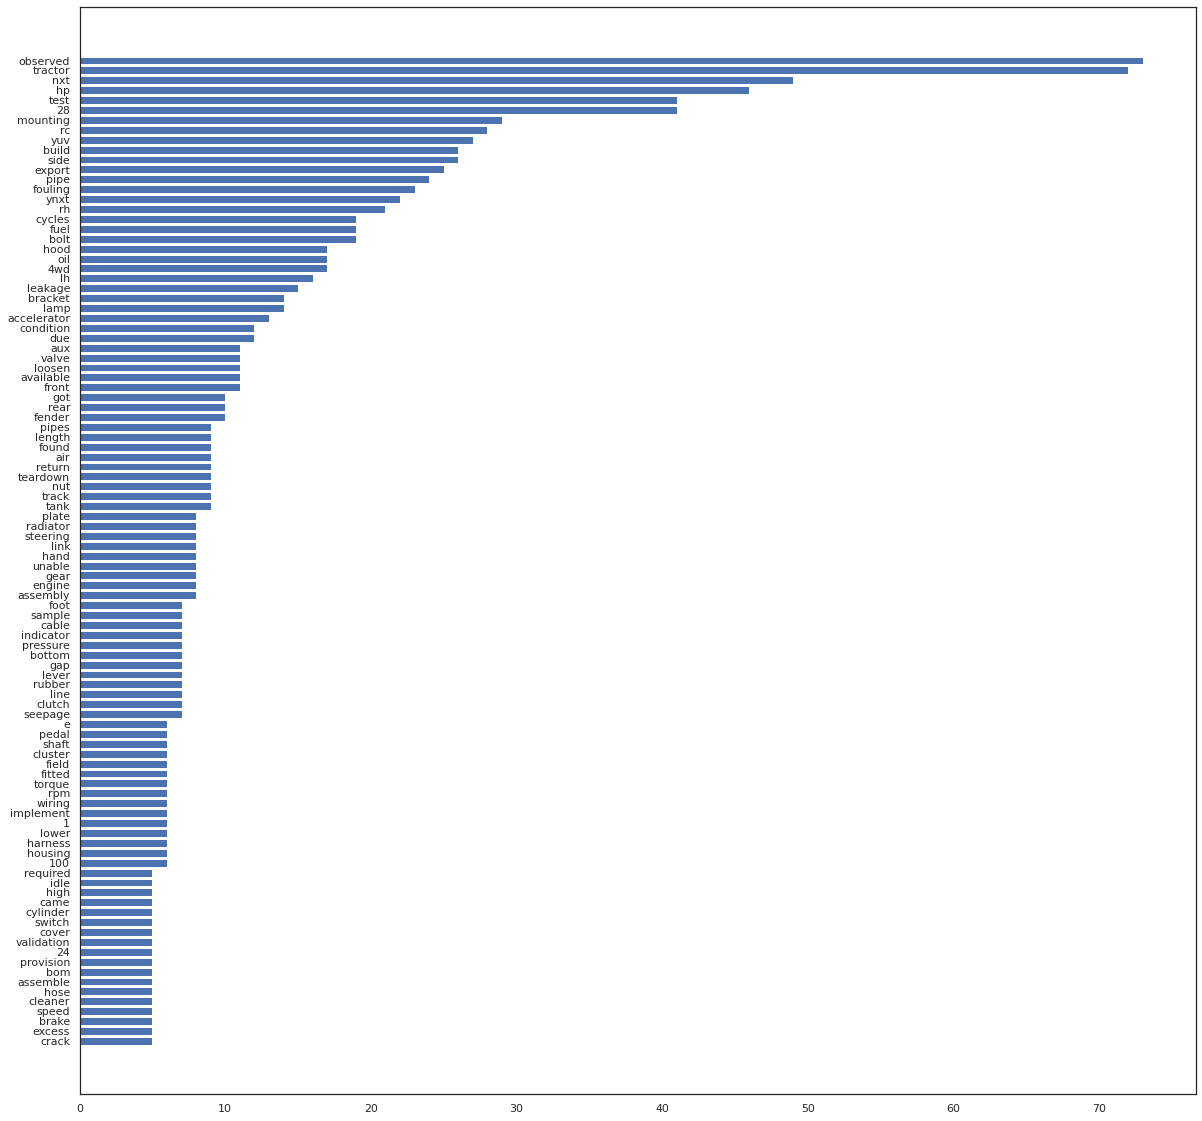

In [112]:
#Checking repeated words for 'Problem Definition (Step-1)' column
from nltk import FreqDist
sns.set(style = 'white')

all_words = ' '.join([text for text in df['Problem Definition (Step-1)']])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
words_df = words_df.nlargest(columns="count", n = 100) 
words_df.sort_values('count', inplace = True)

plt.figure(figsize=(20,20))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

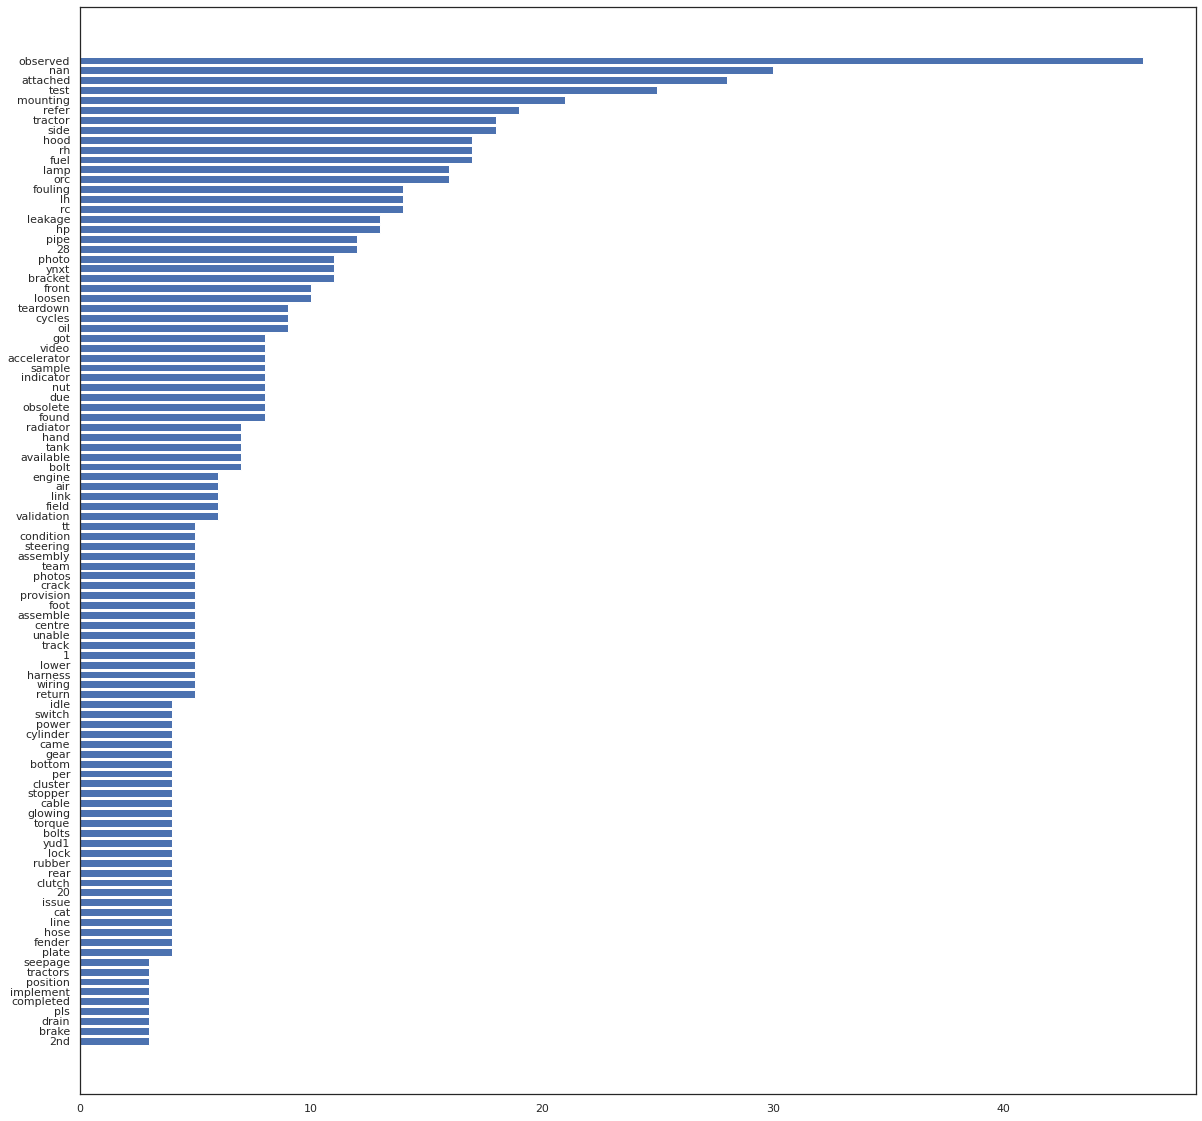

In [113]:
#Checking repeated words for 'Observations (Step-2)' column
sns.set(style = 'white')

all_words = ' '.join([text for text in df['Observations (Step-2)']])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
words_df = words_df.nlargest(columns="count", n = 100) 

words_df.sort_values('count', inplace = True)

plt.figure(figsize=(20,20))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In [114]:
#Function for removing stopwords
add_words = ['tractor','observe','28','test','y','get','find','sample','e','l','100','24',"refer","observed","nan","test","&","refer","28","photo","tractor","due","tt","return","came","per","1","issue","observed","tt","20","cat","pls","position","2nd"]
stop_words.extend(add_words)

def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new


df['Problem Definition (Step-1)'] = [remove_stopwords(r) for r in df['Problem Definition (Step-1)']]
df['Observations (Step-2)'] = [remove_stopwords(r) for r in df['Observations (Step-2)']]

In [115]:
#Lemmatization
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df['Problem Definition (Step-1)'] = df['Problem Definition (Step-1)'].apply(lambda x: lemmatize_sentence(x))
df['Observations (Step-2)'] = df['Observations (Step-2)'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [116]:
df.head(2)

,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Problem Definition (Step-1),Observations (Step-2),ORC Current Status,Time to Solution Release (days),Time to Close the ORC (days),DateX,System_Electrical,...,System_Rear-System,System_Tractor-System,System_Transmission,System_Vehicle-Architect,Stage_1_days,Stage_2_days,Stage_3_days,Stage_4_days,Stage_5_days,Stage_6_days
0,4,0.0,1,feed pump foul hood,feed pump foul hood,8,20.0,36.0,3,0,...,0,0,0,0,0,0,13,0,0,15
1,5,0.0,5,yuv nxt export build aux valve hose pip excess...,,5,14.0,13.0,1,0,...,0,0,0,0,0,1,8,0,0,0


In [117]:
#Tfidf Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2500)
X1 = tfidf.fit_transform(df['Problem Definition (Step-1)']).toarray()
featureNames = tfidf.get_feature_names()
X11=pd.DataFrame(X1, columns = featureNames)

tfidf = TfidfVectorizer(max_features=2500)
X2 = tfidf.fit_transform(df['Observations (Step-2)']).toarray()
featureNames = tfidf.get_feature_names()
X22=pd.DataFrame(X2, columns = featureNames)

In [118]:
#Dropping the unnecessary
lst=['Problem Definition (Step-1)','Observations (Step-2)']

for i in lst:
  df=df.drop(i,axis=1)

In [119]:
df.drop('Time to Close the ORC (days)',axis=1)

,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,ORC Current Status,Time to Solution Release (days),DateX,System_Electrical,System_Engine,System_Engine-Integration,System_Frontal-System,...,System_Rear-System,System_Tractor-System,System_Transmission,System_Vehicle-Architect,Stage_1_days,Stage_2_days,Stage_3_days,Stage_4_days,Stage_5_days,Stage_6_days
0,4,0.0,1,8,20.0,3,0,1,0,0,...,0,0,0,0,0,0,13,0,0,15
1,5,0.0,5,5,14.0,1,0,0,0,0,...,0,0,0,0,0,1,8,0,0,0
2,5,1.0,1,8,21.0,1,0,0,0,0,...,0,0,1,0,0,2,12,0,0,4
3,6,0.0,1,3,1.0,24,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,6,0.0,4,3,1.0,28,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,3,0.0,5,8,11.0,1,0,0,0,0,...,0,0,0,0,0,0,4,0,0,9
145,5,1.0,3,8,10.0,1,1,0,0,0,...,0,0,0,0,0,0,6,0,0,10
146,9,1.0,1,8,21.0,5,1,0,0,0,...,0,0,0,0,0,3,11,0,0,0
147,5,0.0,1,8,16.0,29,0,1,0,0,...,0,0,0,0,0,0,10,0,0,4


In [120]:
df2=df

In [121]:
#Concadinating Dataframes and creating X,y
X=pd.concat([X11,X22,df],axis=1)
y=df2['Time to Close the ORC (days)']

In [122]:
X.head(1)

,10,10k,110,12,14,150,160,16mm,1a,1b,...,System_Rear-System,System_Tractor-System,System_Transmission,System_Vehicle-Architect,Stage_1_days,Stage_2_days,Stage_3_days,Stage_4_days,Stage_5_days,Stage_6_days
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,13,0,0,15




# **ML for regression**



In [123]:
#Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [124]:
#Model Fitting and Training
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(max_depth=21)
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_train)

In [125]:
#actual value vs Predicted value
l2=pd.DataFrame({'actual value':y_train,'predicted vaule':y_pred})
l2.head()

,actual value,predicted vaule
122,3.0,2.94
42,60.0,59.89
148,23.0,22.82
39,59.0,59.00
110,34.0,34.33


In [126]:
#R2 value
from sklearn.metrics import r2_score
print('the R2 score of Random forest Regression : ',r2_score(y_train,y_pred))

the R2 score of Random forest Regression :  0.9676578254778647


In [127]:
y_test_pred=random_forest.predict(X_test)

In [128]:
l1=pd.DataFrame({'actual value':y_test,'predicted vaule':y_test_pred})
l1.head()

,actual value,predicted vaule
23,29.0,29.05
21,50.0,49.37
143,106.0,77.49
7,15.0,14.87
145,20.0,20.81


In [129]:
#R2
print('the R2 score of Random forest Regression : ',r2_score(y_test,y_test_pred))

the R2 score of Random forest Regression :  0.9044637864271042


In [130]:
#Concad of l1 and l2
l3=pd.concat([l1,l2])
l3.head()

,actual value,predicted vaule
23,29.0,29.05
21,50.0,49.37
143,106.0,77.49
7,15.0,14.87
145,20.0,20.81


In [131]:
#Min and Max calculation of Vehicle Service days
l3["Difference"]=abs(l3["actual value"]-l3["predicted vaule"])
sd=l3["Difference"].std()
sd
l3["min_days"]= abs(l3["predicted vaule"]-sd).astype(int) 
l3["max_day"]= abs(l3["predicted vaule"]+sd).astype(int)
l3["actual_predicted"]= abs(l3["predicted vaule"]).astype(int)
l3[["min_days", "actual_predicted", "max_day"]]

,min_days,actual_predicted,max_day
23,23,29,35
21,43,49,55
143,71,77,83
7,8,14,20
145,14,20,26
...,...,...,...
76,51,57,63
32,53,59,64
131,29,35,41
117,15,21,27


# Clustering

In [132]:
t=df[["Severity of Problem","Warrantable/Non Warrantable","Type of ORC","ORC Current Status"]]
tt=cop[['Date of ORC Creation', 'Date to reach at Step 2', 'Date to reach at Step 3', 'Date to reach at Step 4', 'Date to reach at Step 5', 'Date to reach at Step 6','Date to reach at Step 7']]
t1=pd.concat([t,tt],axis=1)
t1.head(2)

,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,ORC Current Status,Date of ORC Creation,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7
0,4,0.0,1,8,2020-12-30 17:49:00,2020-12-30 17:50:00,2020-12-31 13:11:00,2021-01-13 16:23:00,2021-01-19 21:06:00,NaT,2021-02-04 14:48:00
1,5,0.0,5,5,2021-05-17 23:42:00,2021-05-18 02:10:00,2021-05-19 13:00:00,2021-05-28 09:43:00,2021-05-31 11:48:00,2021-06-17 09:02:00,NaT


In [133]:
q=['Date of ORC Creation', 'Date to reach at Step 2', 'Date to reach at Step 3', 'Date to reach at Step 4', 'Date to reach at Step 5', 'Date to reach at Step 6','Date to reach at Step 7']

for i in q:
  t1[i][(t1[i].notnull())] = 1
  t1[i][(t1[i].isnull())] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [134]:
data=pd.concat([X11,X22,t,t1],axis=1)
data.head()

,10,10k,110,12,14,150,160,16mm,1a,1b,...,Warrantable/Non Warrantable,Type of ORC,ORC Current Status,Date of ORC Creation,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,8,1,1,1,1,1,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5,5,1,1,1,1,1,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,8,1,1,1,1,1,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,3,1,1,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4,3,1,1,1,0,0,0,0


#***Model Fitting***

In [135]:
from sklearn import datasets
from sklearn.cluster import KMeans

# Declaring Model
model = KMeans(n_clusters=7)

# Fitting Model
model.fit(data)


# Prediction on the entire data
all_predictions = model.predict(data)

all_predictions

array([1, 2, 1, 6, 5, 3, 0, 3, 2, 3, 3, 2, 5, 4, 6, 5, 1, 1, 4, 0, 3, 3,
       3, 4, 2, 3, 0, 0, 4, 4, 3, 3, 3, 1, 3, 6, 0, 3, 1, 0, 3, 1, 3, 1,
       4, 3, 3, 3, 0, 1, 2, 6, 4, 5, 4, 1, 2, 3, 6, 3, 3, 3, 3, 0, 5, 5,
       3, 3, 2, 6, 3, 3, 5, 0, 2, 3, 0, 2, 3, 1, 0, 2, 0, 3, 2, 2, 5, 2,
       3, 1, 6, 2, 3, 1, 3, 6, 2, 0, 3, 4, 0, 1, 4, 3, 1, 4, 3, 4, 4, 1,
       1, 1, 4, 3, 5, 3, 3, 3, 0, 0, 1, 0, 6, 5, 3, 0, 3, 3, 4, 3, 0, 4,
       5, 3, 1, 3, 5, 2, 6, 3, 4, 4, 3, 4, 0, 3, 4, 1, 2], dtype=int32)

In [136]:
t2 = pd.DataFrame(all_predictions,columns=['stage'])
data["Stage"]=t2['stage']

#final data set
data.iloc[:,-15:]

,Warrantable/Non Warrantable,Type of ORC,ORC Current Status,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,ORC Current Status,Date of ORC Creation,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7,Stage
0,0.0,1,8,4,0.0,1,8,1,1,1,1,1,0,1,1
1,0.0,5,5,5,0.0,5,5,1,1,1,1,1,1,0,2
2,1.0,1,8,5,1.0,1,8,1,1,1,1,1,0,1,1
3,0.0,1,3,6,0.0,1,3,1,1,1,0,0,0,0,6
4,0.0,4,3,6,0.0,4,3,1,1,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.0,5,8,3,0.0,5,8,1,1,1,1,1,0,1,0
145,1.0,3,8,5,1.0,3,8,1,1,1,1,1,0,1,3
146,1.0,1,8,9,1.0,1,8,1,1,1,1,1,0,1,4
147,0.0,1,8,5,0.0,1,8,1,1,1,1,1,0,1,1
